<a href="https://colab.research.google.com/github/karthik-karalgikar/Aedes/blob/main/psnr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
import os
# The path below should point to the directory containing this notebook and the associated utility files
# Change it if necessary
os.chdir('/content/gdrive/MyDrive/')
!ls

 AedesLarvaeDataset	  custom.py		 Mask_Segmentation   test
 AedesLarvaeDataset.zip   Dataset_Segmentation	 model_new.py	     train
 annotations.json	  MainDataset		 pred		     unet++ipynb.ipynb
'Colab Notebooks'	  Masked_images		 __pycache__


In [9]:
files=(os.listdir('./MainDataset/'))
print(len(files))

464


In [10]:
# import the necessary packages
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils
import cv2
from scipy import ndimage, misc
from math import log10, sqrt
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F).var()

#PSNR - Peak Signal-to-Noise Ratio

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
# The purpose of this script is to assess each image's sharpness and quality loss after applying a median filter,
# which can help in understanding how images would perform under different processing conditions

In [12]:
blurriness=np.zeros(len(files))
SSIM=np.zeros((len(files),len(files)))
img_psnr=np.zeros(len(files))
print("Image#,       blurriness index,        PSNR")
for i in range(len(files)):

  img=cv2.imread('./MainDataset/'+files[i])
  img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray=(img_gray-np.min(img_gray))/np.ptp(img_gray)
  print(i, np.max(img_gray))
  blurriness[i]=variance_of_laplacian(img_gray)
  img_filt=ndimage.median_filter(img_gray, size=20)
  img_psnr[i]=PSNR(img_gray,img_filt)
  print(files[i],'\t', blurriness[i],'\t', img_psnr[i])

Image#,       blurriness index,        PSNR
0 1.0
aedes (2).jpg 	 0.00031761237340478685 	 88.35000646586172
1 1.0
aedes (3).jpg 	 0.00045913902530563406 	 87.715684081563
2 1.0
aedes (5).jpg 	 0.0003004243534337785 	 88.54454435226452
3 1.0
aedes (6).jpg 	 0.00046479439776455955 	 87.41028204041349
4 1.0
aedes (8).jpg 	 0.0003144086193335017 	 88.08464289088171
5 1.0
aedes (9).jpg 	 0.00035415317466525243 	 88.16568572056363
6 1.0
aedes (11).jpg 	 0.00030785467353492806 	 86.56806924741984
7 1.0
aedes (12).jpg 	 0.0005919504347643164 	 85.74437909395535
8 1.0
aedes (14).jpg 	 0.0006229765972170962 	 86.38565000064447
9 1.0
aedes (15).jpg 	 0.0005004913171675534 	 86.52971483441644
10 1.0
aedes (17).jpg 	 0.0007285825583425898 	 85.96725456365208
11 1.0
aedes (18).jpg 	 0.000467867153234641 	 88.17852647216172
12 1.0
aedes (20).jpg 	 0.00044847757704833145 	 87.21620749683657
13 1.0
aedes (21).jpg 	 0.0004987510085903254 	 87.32397338463315
14 1.0
aedes (23).jpg 	 0.0002868085599709734

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


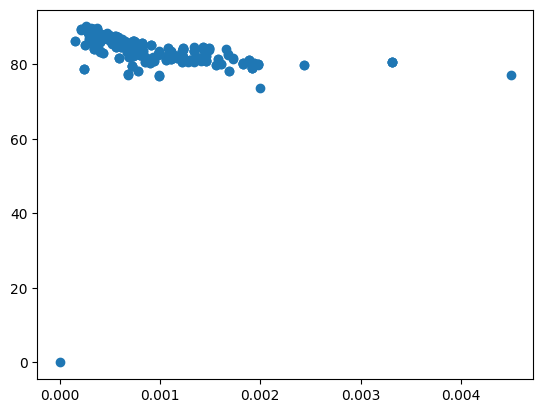

In [13]:
plt.scatter(blurriness,img_psnr)

In [14]:
print(np.percentile(blurriness, [20,80]),np.percentile(img_psnr, [10,90]))

[0.0003786 0.0011866] [80.51720593 88.4441796 ]


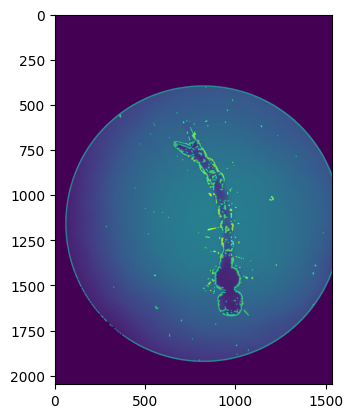

In [15]:
# First, we visualize the overlays
for i in range(40):#run till len(files)
  img=cv2.imread('./MainDataset/'+files[i])
  img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  GT=cv2.imread('./Masked_images/'+files[i])
  GT_gray=cv2.cvtColor(GT, cv2.COLOR_BGR2GRAY)
  dst = cv2.addWeighted(img_gray, 0.5, GT_gray, 0.5, 0.0)
  plt.imshow(dst)


In [16]:
mean_pix=np.zeros(len(files))
cov=np.zeros(len(files))
print('Image #,            Mean Pixel,          Coefficient of Variation')
for i in range(len(files)):
    print(i)
    img=cv2.imread('./MainDataset/'+files[i])
    img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray=(img_gray-np.min(img_gray))/np.ptp(img_gray)
    GT=cv2.imread('./Masked_images/'+files[i])
    GT_gray=cv2.cvtColor(GT, cv2.COLOR_BGR2GRAY)
    pixl=img_gray*GT_gray
    mean_pix[i]=np.mean(pixl)
    cov[i]=np.std(pixl)/mean_pix[i]
  #print(files[i], '\t', mean_pix[i], '\t', cov[i])

Image #,            Mean Pixel,          Coefficient of Variation
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


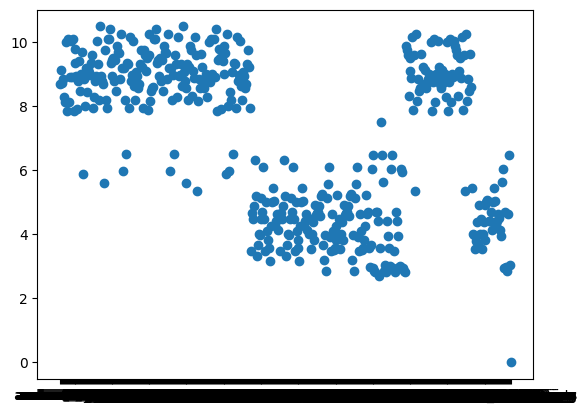

In [17]:
plt.scatter(files,cov)

In [18]:
print(np.percentile(cov, [25,50,75]))

[4.48259885 8.11135825 9.10927191]
